# exercise 14
## Task 1
For each review included in the dataset, use `spacytextblob` and its inherent document-level scores to get the polarity score of the text. Create a violinplot with the x-axis being individual reviews' star rating, and the y-axis being the calculated polarity scores. Interpret the results. 

In [1]:
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [2]:
#professor code
import json

with open('yelp_academic_dataset_review_Nov2022_small.jsonl') as f:
    for line in f:
        review_dict = json.loads(line)
        print(review_dict)
        break

{'review_id': 'KU_O5udG6zpxOg-VcAEodg', 'user_id': 'mh_-eMZ6K5RLWhZyISBhwA', 'business_id': 'XQfwVwDr-v0ZS3_CbbE5Xw', 'stars': 3.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", 'date': '2018-07-07 22:09:11'}


In [3]:
data = pd.read_json('yelp_academic_dataset_review_Nov2022_small.jsonl', lines=True)

In [4]:
data

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
9995,ZcBtCA9jGhLfakf1jJ2BAg,yab1cq5yzrTHzoyz8LYqYQ,1-z7wd860Rii4kbEMCT8DA,5,0,0,0,Excellent food and service. The place is funct...,2018-06-26 17:41:31
9996,UIkEO-10J6Y99IhRqUflvg,lYAmgL_l7A3MPFYe1DYKrw,EpREWeEpmR8f1qLHzzF0AA,5,0,1,0,Just about to get tucked into a meatloaf that ...,2018-01-09 20:26:13
9997,S-NQM3Axcg8JS3MXHUIvyw,rE2WwfgJbYfvDwBlgq__dQ,dvidzWEPgTQPeBc8CUV2OQ,5,0,0,0,Outstanding customer service! And my car is dr...,2015-04-01 21:50:28
9998,ME79YrEhm2xe4IQy_0zkGw,OnIklvzKDpk1BduC84TrTA,2XYPFRm7teCUr3eGsB2-qw,5,0,0,0,I and my husband went here for Dinner one day ...,2015-06-08 19:32:26


In [5]:
nlp = spacy.load('en_core_web_md')

In [6]:
nlp.add_pipe('spacytextblob')

In [7]:
data.iloc[0]

review_id                                 KU_O5udG6zpxOg-VcAEodg
user_id                                   mh_-eMZ6K5RLWhZyISBhwA
business_id                               XQfwVwDr-v0ZS3_CbbE5Xw
stars                                                          3
useful                                                         0
funny                                                          0
cool                                                           0
text           If you decide to eat here, just be aware it is...
date                                         2018-07-07 22:09:11
Name: 0, dtype: object

In [8]:
nlp(data.iloc[0]['text'])

If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. 

The food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.

In [9]:
data['nlp'] = data.apply(axis=1,
   func=lambda x: nlp(x['text']),
    result_type='reduce')

In [10]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,nlp
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"(If, you, decide, to, eat, here, ,, just, be, ..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,"(I, 've, taken, a, lot, of, spin, classes, ove..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"(Family, diner, ., Had, the, buffet, ., Eclect..."
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"(Wow, !, , Yummy, ,, different, ,, , delicio..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,"(Cute, interior, and, owner, (, ?, ), gave, us..."


In [11]:
def preprocess(row):
    cleaned_doc = []
    for token in row['nlp']:
        if token.is_alpha and not token.is_stop:
            cleaned_doc.append(token.lemma_.lower())
    return cleaned_doc

In [12]:
#preprocessing, as described in class
#in order to use gensim, professor said that we should preprocess
wordList = list(data.head(100).apply(axis=1, func=preprocess))

In [13]:
import gensim
gen_dict = gensim.corpora.Dictionary(wordList)

In [14]:
doc_term_matrix = []
for i in range(len(wordList)):
    doc_term_matrix.append(gen_dict.doc2bow(wordList[i]))

In [15]:
#getting back to my stuff
data['polarity'] = data.apply(axis=1,
   func=lambda x: x['nlp']._.blob.polarity,
    result_type='reduce')

In [16]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,nlp,polarity
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"(If, you, decide, to, eat, here, ,, just, be, ...",0.085278
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,"(I, 've, taken, a, lot, of, spin, classes, ove...",0.402273
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"(Family, diner, ., Had, the, buffet, ., Eclect...",0.139935
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"(Wow, !, , Yummy, ,, different, ,, , delicio...",0.302557
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,"(Cute, interior, and, owner, (, ?, ), gave, us...",0.400969


<AxesSubplot:xlabel='stars', ylabel='polarity'>

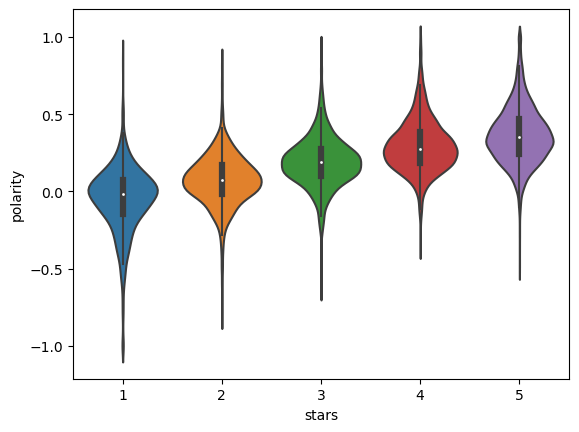

In [17]:
import seaborn
seaborn.violinplot(data=data, x='stars', y='polarity')

## Task 2
For each review included in the dataset, extract the subjective phrases in the text using  `spacytextblob` and its `sentiment_assessments.assessments` feature. Then, for each review whose review_id is in the following `target_review_ids` list, find the top 3 reviews that are most similar to it in terms of their subjective phrases. What is the rating of each of the target reviews? What about the rating of their top 3 most similar reviews? Are they correlated? Interpret the results. 

In [18]:
target_review_ids = ["40thYphUgIfvJq17QCfTwA", "E9AB7V4z8xrt2uPF7T55FQ", "4PHFo_GRG4FEk1q4X7xQVQ", "4KpIldEM-tdnrJLqYzRfZQ", "PDHRlnEdkEcwATry4w71PQ", "meGaFP7yxQdjyABrYDVeoQ", "pgESDcC7eDx4z_epqon4_Q", "qeSxL-POvGLZD6aQ5O9kvw"]

In [19]:
phraseFrame = pd.DataFrame({'review_id':target_review_ids})

In [20]:
phraseFrame['phrases'] = phraseFrame.apply(axis=1,
   func=lambda x: data.loc[data['review_id'] == x.review_id].iloc[0].nlp._.blob.sentiment_assessments.assessments,
    result_type='reduce')

In [21]:
phraseFrame

,review_id,phrases
0,40thYphUgIfvJq17QCfTwA,"[([great], 0.8, 0.75, None), ([nice], 0.6, 1.0..."
1,E9AB7V4z8xrt2uPF7T55FQ,"[([amazing], 0.6000000000000001, 0.9, None), (..."
2,4PHFo_GRG4FEk1q4X7xQVQ,"[([great, !, !, !, !, !, !, !, !, !], 1.0, 0.7..."
3,4KpIldEM-tdnrJLqYzRfZQ,"[([only], 0.0, 1.0, None), ([awesome, !], 1.0,..."
4,PDHRlnEdkEcwATry4w71PQ,"[([plain], -0.21428571428571427, 0.35714285714..."
5,meGaFP7yxQdjyABrYDVeoQ,"[([seriously], -0.3333333333333333, 0.66666666..."
6,pgESDcC7eDx4z_epqon4_Q,"[([half], -0.16666666666666666, 0.166666666666..."
7,qeSxL-POvGLZD6aQ5O9kvw,"[([rarely], 0.3, 0.9, None), ([honestly], 0.6,..."


In [22]:
phraseFrame = phraseFrame.merge(data[['review_id', 'stars']], on='review_id')

In [23]:
phraseFrame

,review_id,phrases,stars
0,40thYphUgIfvJq17QCfTwA,"[([great], 0.8, 0.75, None), ([nice], 0.6, 1.0...",5
1,E9AB7V4z8xrt2uPF7T55FQ,"[([amazing], 0.6000000000000001, 0.9, None), (...",5
2,4PHFo_GRG4FEk1q4X7xQVQ,"[([great, !, !, !, !, !, !, !, !, !], 1.0, 0.7...",5
3,4KpIldEM-tdnrJLqYzRfZQ,"[([only], 0.0, 1.0, None), ([awesome, !], 1.0,...",5
4,PDHRlnEdkEcwATry4w71PQ,"[([plain], -0.21428571428571427, 0.35714285714...",1
5,meGaFP7yxQdjyABrYDVeoQ,"[([seriously], -0.3333333333333333, 0.66666666...",1
6,pgESDcC7eDx4z_epqon4_Q,"[([half], -0.16666666666666666, 0.166666666666...",1
7,qeSxL-POvGLZD6aQ5O9kvw,"[([rarely], 0.3, 0.9, None), ([honestly], 0.6,...",1


In [24]:
#wrote all this code in such a way that all you would need to do to change
#the top 3 to a different number (like top 5), is change the variable topN here
topN = 3
realTopScores = []
for phraseRow in phraseFrame.iloc:
    topScores = [(0, '')] * topN
    for row in data.iloc:
        score = 0
        for phrase in row.nlp._.blob.sentiment_assessments.assessments:
            if phrase in phraseRow.phrases:
                score +=1
        for i in range(len(topScores)): #not the most efficient, but quicker to type
            if score > topScores[i][0]:
                topScores.insert(i, (score, row.review_id))
                topScores.pop()
                break
    realTopScores.append(topScores)

In [25]:
#not keeping the scores, though we could
for reviewNum in range(topN):
    scoreList = []
    for i in range(len(realTopScores)):
        scoreList.append(realTopScores[i][reviewNum][1])
    phraseFrame['review #' + str(reviewNum)] = scoreList

In [26]:
phraseFrame

,review_id,phrases,stars,review #0,review #1,review #2
0,40thYphUgIfvJq17QCfTwA,"[([great], 0.8, 0.75, None), ([nice], 0.6, 1.0...",5,oBYVK1aVJdU15NNUgfYvFw,kgIF5n-s1RhQVzQNrQ5n8Q,jHs1v7FXUVD4170FSQez8Q
1,E9AB7V4z8xrt2uPF7T55FQ,"[([amazing], 0.6000000000000001, 0.9, None), (...",5,fwkS8EOq6mS5Jf_OYf5fZw,1aNrSU9CHuFnBuNFTD2cBQ,0sEpvW1O7AipPO-vW8Aq5A
2,4PHFo_GRG4FEk1q4X7xQVQ,"[([great, !, !, !, !, !, !, !, !, !], 1.0, 0.7...",5,4PHFo_GRG4FEk1q4X7xQVQ,3MEJ8-95g8lj_D8S0HFpuQ,Bhn9WcAe2rO26HT-TLKK_Q
3,4KpIldEM-tdnrJLqYzRfZQ,"[([only], 0.0, 1.0, None), ([awesome, !], 1.0,...",5,4KpIldEM-tdnrJLqYzRfZQ,na-gQZQh3bwJHmIDE8XFtQ,9lXH6vIXS_-1NuHWx_d_bw
4,PDHRlnEdkEcwATry4w71PQ,"[([plain], -0.21428571428571427, 0.35714285714...",1,PDHRlnEdkEcwATry4w71PQ,IgfUV2Ggcl36kS7mv8wsaw,BJ_l-doGBK50wzJO7uWt9g
5,meGaFP7yxQdjyABrYDVeoQ,"[([seriously], -0.3333333333333333, 0.66666666...",1,VpgsJiM3zqrhrwJi8bkz2Q,0aC3eVgDQFE6gH2Fk-MrDg,tMa58XRCtpE7N7ygYgye2A
6,pgESDcC7eDx4z_epqon4_Q,"[([half], -0.16666666666666666, 0.166666666666...",1,RLrs5xYkjxvY03MmpLwv0Q,pgESDcC7eDx4z_epqon4_Q,LEPLQeZh436XbCPzLVqsnA
7,qeSxL-POvGLZD6aQ5O9kvw,"[([rarely], 0.3, 0.9, None), ([honestly], 0.6,...",1,qeSxL-POvGLZD6aQ5O9kvw,kLgcYk9TxIjLe6y6eChetg,oXuRc5x1FLLbLVs7vjxPSw


In [27]:
for reviewNum in range(topN):
    phraseFrame = phraseFrame.merge(data[['review_id', 'stars']], left_on='review #'+str(reviewNum), right_on='review_id', suffixes=(None, '_y'))
    phraseFrame.drop('review_id_y', axis=1, inplace=True)
    phraseFrame.rename({'stars_y': 'stars #' +str(reviewNum)}, axis=1, inplace=True)

In [28]:
phraseFrame

,review_id,phrases,stars,review #0,review #1,review #2,stars #0,stars #1,stars #2
0,40thYphUgIfvJq17QCfTwA,"[([great], 0.8, 0.75, None), ([nice], 0.6, 1.0...",5,oBYVK1aVJdU15NNUgfYvFw,kgIF5n-s1RhQVzQNrQ5n8Q,jHs1v7FXUVD4170FSQez8Q,5,1,5
1,E9AB7V4z8xrt2uPF7T55FQ,"[([amazing], 0.6000000000000001, 0.9, None), (...",5,fwkS8EOq6mS5Jf_OYf5fZw,1aNrSU9CHuFnBuNFTD2cBQ,0sEpvW1O7AipPO-vW8Aq5A,5,4,3
2,4PHFo_GRG4FEk1q4X7xQVQ,"[([great, !, !, !, !, !, !, !, !, !], 1.0, 0.7...",5,4PHFo_GRG4FEk1q4X7xQVQ,3MEJ8-95g8lj_D8S0HFpuQ,Bhn9WcAe2rO26HT-TLKK_Q,5,4,1
3,4KpIldEM-tdnrJLqYzRfZQ,"[([only], 0.0, 1.0, None), ([awesome, !], 1.0,...",5,4KpIldEM-tdnrJLqYzRfZQ,na-gQZQh3bwJHmIDE8XFtQ,9lXH6vIXS_-1NuHWx_d_bw,5,4,4
4,PDHRlnEdkEcwATry4w71PQ,"[([plain], -0.21428571428571427, 0.35714285714...",1,PDHRlnEdkEcwATry4w71PQ,IgfUV2Ggcl36kS7mv8wsaw,BJ_l-doGBK50wzJO7uWt9g,1,1,5
5,meGaFP7yxQdjyABrYDVeoQ,"[([seriously], -0.3333333333333333, 0.66666666...",1,VpgsJiM3zqrhrwJi8bkz2Q,0aC3eVgDQFE6gH2Fk-MrDg,tMa58XRCtpE7N7ygYgye2A,1,4,5
6,pgESDcC7eDx4z_epqon4_Q,"[([half], -0.16666666666666666, 0.166666666666...",1,RLrs5xYkjxvY03MmpLwv0Q,pgESDcC7eDx4z_epqon4_Q,LEPLQeZh436XbCPzLVqsnA,3,1,5
7,qeSxL-POvGLZD6aQ5O9kvw,"[([rarely], 0.3, 0.9, None), ([honestly], 0.6,...",1,qeSxL-POvGLZD6aQ5O9kvw,kLgcYk9TxIjLe6y6eChetg,oXuRc5x1FLLbLVs7vjxPSw,1,1,3


Reviews with the most similar subjective phrases have similar star ratings.